**Understanding the host/customer behavior of the Airbnb users in Rio de Janeiro**


The chosen Dataset was the Rio de Janeiro AirBNB Data, which contains information about the available apartments to rent in the city of Rio de Janeiro using the AirBNB platform. Let's first import the necessary libraries and load the available data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from scipy import stats
%matplotlib inline


In [2]:
df = pd.read_csv('/content/listings.csv', error_bad_lines=False, sep=';')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,"2,02012E+13",30/12/2020,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,08/01/2010,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-2296592,-4317896,Entire condominium,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Hot water"", ""Essentials"", ""Stove"", ""Microwav...",$500.00,5,180,5,5,1125,1125,50,11250,NaN,t,0,0,0,0,30/12/2020,259,13,2,15/07/2010,26/12/2020,93.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,203.0
1,25026,https://www.airbnb.com/rooms/25026,"2,02012E+13",24/12/2020,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,Ghizlane,03/10/2012,"Rio de Janeiro, Rio de Janeiro, Brazil","French girl ""lost in Brazilian translation"" si...",within a day,89%,71%,f,https://a0.muscache.com/im/pictures/user/fffed...,https://a0.muscache.com/im/pictures/user/fffed...,Ipanema,11.0,11.0,"['phone', 'reviews', 'jumio', 'offline_governm...",t,f,"Rio de Janeiro, Brazil",Copacabana,NaN,-2297712,-4319045,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""TV"", ""Cable TV"", ""Elevator"", ""Essentials"", ""...",$160.00,7,60,7,7,60,60,70,600,NaN,t,7,30,60,335,24/12/2020,238,2,0,07/06/2010,15/02/2020,94.0,9.0,9.0,9.0,10.0,10.0,9.0,NaN,f,11,11,0,0,185.0
2,35636,https://www.airbnb.com/rooms/35636,"2,02012E+13",24/12/2020,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,Patricia,27/06/2010,"San Carlos de Bariloche, Rio Negro, Argentina","I am Brazilian and Carioca graphic designer, b...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/153232/profil...,https://a0.muscache.com/im/users/153232/profil...,Ipanema,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-2298816,-4319359,Entire apartment,Entire home/apt,2,NaN,1.5 baths,1.0,1.0,"[""Elevator"", ""Microwave"", ""Essentials"", ""Kitch...",$2

**Question 1**

Which neighbourhoods have the best average rating and how the average price influences on that?
For this analysis, we wil get just neighbourhoods with more than 30 records in the database to have statistical significance.

In [3]:
df2=df.groupby('neighbourhood_cleansed').filter(lambda x: x['neighbourhood_cleansed'].count()>=30)
df2['review_scores_rating'].groupby(df2['neighbourhood_cleansed']).mean().sort_values(ascending=False)

neighbourhood_cleansed
Engenho Novo                98.923077
Alto da Boa Vista           98.904762
Cosme Velho                 97.358974
São Cristóvão               97.282051
Jardim Guanabara            96.794118
Joá                         96.540541
Gávea                       96.534483
Todos os Santos             96.214286
Rio Comprido                96.000000
Jardim Botânico             95.938596
Praça da Bandeira           95.772727
Curicica                    95.571429
Campo Grande                95.531250
Laranjeiras                 95.514056
Humaitá                     95.445652
Botafogo                    95.433208
Urca                        95.313433
Jacarepaguá                 95.286982
Lagoa                       95.248062
Centro                      95.217105
Vila Isabel                 95.200000
Leblon                      95.179221
Santa Teresa                95.163993
Glória                      95.106870
Tijuca                      95.102439
Barra da Tijuca            

In [4]:
df2['price'] = df2['price'].replace('[\$,]', '', regex=True).astype(float)
df2['price'].groupby(df2['neighbourhood_cleansed']).mean().sort_values(ascending=False)

neighbourhood_cleansed
São Cristóvão               8131.831169
Alto da Boa Vista           5239.025641
Joá                         5058.811765
São Conrado                 2396.053097
Guaratiba                   2288.862069
Barra de Guaratiba          1412.352941
Itanhangá                   1214.289855
Andaraí                     1145.700000
Lagoa                       1116.291339
Ipanema                     1096.267945
Leblon                      1086.402766
Barra da Tijuca             1077.018934
Copacabana                   959.257814
Gávea                        885.284211
Recreio dos Bandeirantes     819.191793
Vargem Pequena               816.982143
Jardim Botânico              804.360577
Leme                         783.415822
Vargem Grande                761.625000
Taquara                      688.467742
Maracanã                     664.542169
Santa Teresa                 647.279944
Jacarepaguá                  642.089191
Cosme Velho                  625.950617
Humaitá          

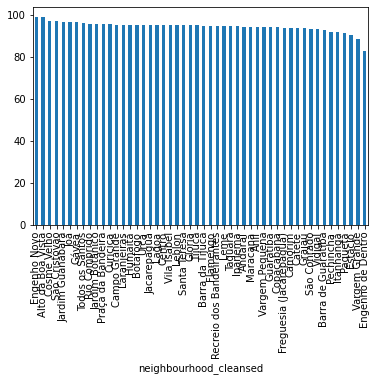

In [5]:
df2['review_scores_rating'].groupby(df2['neighbourhood_cleansed']).mean().sort_values(ascending=False).plot(kind="bar")

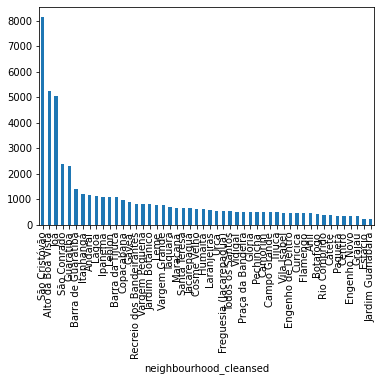

In [6]:
df2['price'] = df2['price'].replace('[\$,]', '', regex=True).astype(float)
df2['price'].groupby(df2['neighbourhood_cleansed']).mean().sort_values(ascending=False).plot(kind="bar")

Considering that São Cristovão is not considered a "noble neighbourhood" in Rio, maybe there is some outliers in this dataset. Let's take a deep analysis.

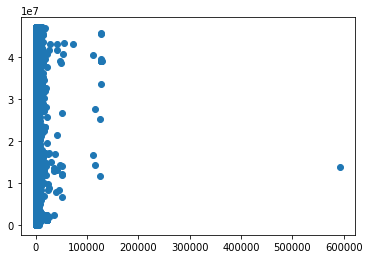

In [7]:
plt.scatter(df2['price'], df2['id'])
#sns.scatterplot(x=df2['price'], y=df2['id'], hue=df2['neighbourhood_cleansed'])

It seems to have some outliers in this dataset. Let's use z-score to remove then and help in our analysis.

In [8]:
z_scores = stats.zscore(df2['price'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_new = df2[filtered_entries]

In [9]:
df2.shape


(24913, 74)

In [10]:
df_new.shape

(24836, 74)

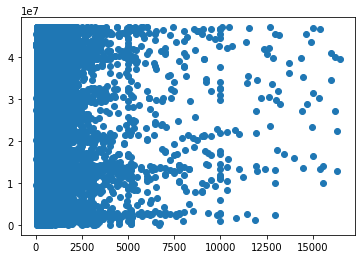

In [11]:
plt.scatter(df_new['price'], df_new['id'])

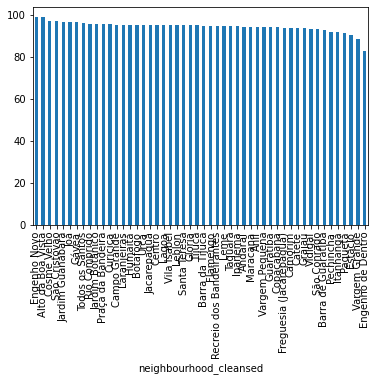

In [12]:
df_new['review_scores_rating'].groupby(df_new['neighbourhood_cleansed']).mean().sort_values(ascending=False).plot(kind="bar")

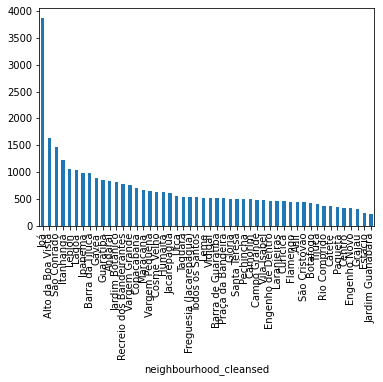

In [13]:
#df_new['price'] = df_new['price'].replace('[\$,]', '', regex=True).astype(float)
df_new['price'].groupby(df_new['neighbourhood_cleansed']).mean().sort_values(ascending=False).plot(kind="bar")

Removing the outliers, it was possible to notice a substancial difference in the position of the most expensive neighbourhoods. Joá is considered a "luxurious neighbourhood" in Rio, so this gap in the average price seems aceptable.

From the values and plots above, it is possible to note that the 3 neighbourhoods with the highest average rating (Engenho Novo, Alto da Boa Vista and Cosme Velho) are not in the group of the most expensive neighbourhoods (except for Alto da Boa Vista). Engenho Novo is just in the 47th position (of 50 considered neighbourhoods), while Alto da Boa Vista and Cosme Velho are in the 2th and 18th, respectively.

For 3 most expensive neighbourhoods (Joá, Alto da Boa Vista and São Conrado), they are positioned in the 6th, 2th and 43th , respectively, in the average rating ranking. Aparently, there is no direct relationship between rent price and user rating. There are even some neighbourdhoods with high average price in the last positions in the rating ranking ( Like São Conrado).


**Question 2**

The rent price normally increases as the number of people that the house/apartment can accommodate increases? For this analysis, we wil get just 'accommodates' group with more than 30 records in the database to have statistical significance.


In [14]:
df3=df_new.groupby('accommodates').filter(lambda x: x['accommodates'].count()>=30)
df3['price'] = df3['price'].replace('[\$,]', '', regex=True).astype(float)
df3['price'].groupby(df3['accommodates']).mean()
#df['price'].groupby(df2['accommodates']).count()

accommodates
1      260.325599
2      333.291013
3      400.241849
4      613.020414
5      737.125063
6     1120.030851
7     1240.722745
8     1742.566704
9     1657.100592
10    2256.763713
11    1893.886364
12    2762.504950
14    3289.037037
15    2674.781250
16    2599.651282
Name: price, dtype: float64

In [15]:
df3['price'].groupby(df3['accommodates']).count()

accommodates
1     1293
2     6310
3     2602
4     6641
5     1983
6     3209
7      572
8      989
9      169
10     474
11      44
12     202
14      54
15      64
16     195
Name: price, dtype: int64

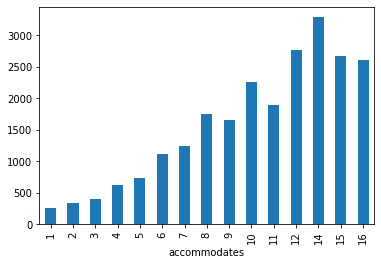

In [16]:
df3['price'].groupby(df3['accommodates']).mean().plot(kind="bar")

Based on the values above, it seems that the average price  increases as the number of people that the apartment/house accommodates increases, for the most of the considered groups. It is not a linear relationship, but it seems to be some correlation between number of people that the apartment/house accommodates and the charged price.


**Question 3**

Is it possible to predict the rent price of a house/apartment based in its main attributes?
First let's choose some numeric attributes and try to find a relationship with the rent price.


In [17]:
df_new['price'] = df_new['price'].replace('[\$,]', '', regex=True).astype(float)
df_new.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.483600e+04,2.483600e+04,24828.000000,24828.000000,0.0,24836.000000,0.0,23145.000000,24614.000000,24836.000000,24836.000000,2.483600e+04,24836.000000,24836.000000,2.483600e+04,2.483600e+04,24836.000000,2.483600e+04,0.0,24836.000000,24836.000000,24836.000000,24836.000000,24836.000000,24836.000000,24836.000000,14982.000000,14968.000000,14971.000000,14969.000000,14974.000000,14969.000000,14971.000000,0.0,24836.000000,24836.000000,24836.000000,24836.000000,15510.000000
mean,2.442227e+07,9.522066e+07,8.451184,8.451184,NaN,4.176880,NaN,1.709138,2.548428,723.253021,4.743840,4.088446e+04,4.616967,5.366162,4.099169e+04,4.100670e+04,48.027219,4.100400e+05,NaN,16.870953,37.621678,59.765864,214.286318,12.288935,2.679659,0.232807,94.707849,9.650187,9.409058,9.812546,9.772138,9.780747,9.307595,NaN,6.700475,5.800612,0.780601,0.086568,57.362282
std,1.533437e+07,1.038903e+08,55.346975,55.346975,NaN,2.493963,NaN,1.043264,2.123266,1186.184284,18.977488,6.345399e+06,18.706317,20.000036,6.345398e+06,6.345398e+06,190.080210,6.345398e+07,NaN,11.804387,23.069996,33.814150,140.607958,29.799505,5.813390,0.773059,9.251106,0.895352,1.090339,0.726494,0.774197,0.698284,1.021300,NaN,20.277702,19.783642,1.682481,0.621534,81.284085
min,1.787800e+04,3.607000e+03,0.000000,0.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,10.000000,1.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.181795e+07,1.399613e+07,1.000000,1.000000,NaN,2.000000,NaN,1.000000,1.000000,201.000000,2.000000,3.000000e+01,1.000000,2.000000,8.900000e+01,9.000000e+01,20.000000,9.000000e+02,NaN,3.000000,16.000000,31.000000,82.000000,0.000000,0.000000,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,9.000000
50%,2.270714e+07,5.673417e+07,2.000000,2.000000,NaN,4.000000,NaN,1.000000,2.000000,390.000000,3.000000,1.125000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+04,NaN,20.000000,49.000000,78.000000,241.000000,2.000000,0.000000,0.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,23.000000
75%,4.011007e+07,1.440112e+08,4.000000,4.000000,NaN,5.000000,NaN,2.000000,3.000000,777.000000,4.000000,1.125000e+03,4.000000,5.000000,1.125000e+03,1.125000e+03,40.000000,1.125000e+04,NaN,29.000000,58.000000,88.000000,359.000000,9.000000,2.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,73.000000
max,4.722176e+07,3.812899e+08,4355.000000,4355.000000,NaN,16.000000,NaN,30.000000,50.000000,16481.000000,1000.000000,1.000000e+09,1000.000000,1000.000000,1.000000e+09,1.000000e+09,10000.000000,1.000000e+10,NaN,30.000000,60.000000,90.000000,365.000000,431.000000,116.000000,15.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,200.000000,195.000000,17.000000,11.000000,1455.000000


In [18]:
df_new['bathrooms_text']

0           1 bath
1           1 bath
2        1.5 baths
3           1 bath
4           1 bath
           ...    
25779      6 baths
25780       1 bath
25781      2 baths
25782       1 bath
25783       1 bath
Name: bathrooms_text, Length: 24836, dtype: object

The 'bathrooms' column seems to be all null, while the column 'bathrooms_text' have some information about the number of bathrooms. Let's try get some numeric information from this column.



In [19]:
df_new['bathrooms_text']=df_new['bathrooms_text'].str.split(' ').str[0]
df_new['bathrooms_text']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0          1
1          1
2        1.5
3          1
4          1
        ... 
25779      6
25780      1
25781      2
25782      1
25783      1
Name: bathrooms_text, Length: 24836, dtype: object

In [20]:
df_new['bathrooms_text']

0          1
1          1
2        1.5
3          1
4          1
        ... 
25779      6
25780      1
25781      2
25782      1
25783      1
Name: bathrooms_text, Length: 24836, dtype: object

In [21]:
df_new.loc[df_new['bathrooms_text'] == "Shared", 'bathrooms_text'] = 0.5
df_new.loc[df_new['bathrooms_text'] == "Half-bath", 'bathrooms_text'] = 0.5
df_new.loc[df_new['bathrooms_text'] == "Private", 'bathrooms_text'] = 0.5
df_new['bathrooms_text']=df_new['bathrooms_text'].astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


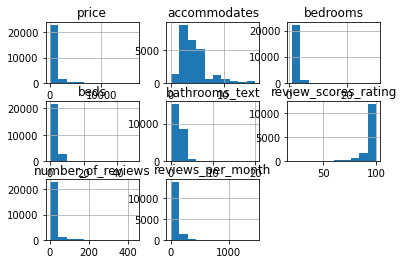

In [22]:
df_corr=df_new[['price','accommodates','bedrooms','beds','bathrooms_text','review_scores_rating','number_of_reviews','reviews_per_month']]
df_corr.hist();

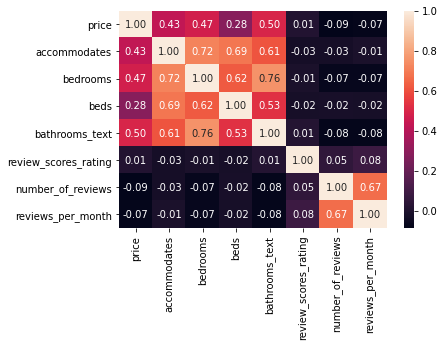

In [23]:
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f");

The variables related to reviews doesn't seem to have a strong relationship with the price, while the variables number of beds, bedrooms, bathrooms and people that the apartment accommodates seems to have a strong relationship.

Let's use these 4 variables (beds, bedrooms,bathrooms and accommodates) to try to predict the rent price.




In [24]:
#Drop the rows with missing price values
df_new  = df_new.dropna(subset=['price'], axis=0)

In [25]:
#Fill the mean of the column for any missing values
df_new=df_new.fillna(df_new.mean())

In [26]:
#Split into X and y
X = df_new[['accommodates','bedrooms','beds','bathrooms_text']]
y = df_new['price']

In [27]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30) 

In [28]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)


    
  



In [30]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.29433065491763377.  The rsquared on the test data was 0.2665094679427027.


The results with just the numeric attributes is not quite good yet. Let´s try to add some categorical features.

In [31]:
X = df_new[['accommodates','bedrooms','beds','bathrooms_text','neighbourhood_cleansed','room_type','property_type']]
y = df_new['price']

In [32]:
# Dummy the categorical variables
cat_vars = X.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var)], axis=1)

In [33]:
X

,accommodates,bedrooms,beds,bathrooms_text,neighbourhood_cleansed_Alto da Boa Vista,neighbourhood_cleansed_Andaraí,neighbourhood_cleansed_Anil,neighbourhood_cleansed_Barra da Tijuca,neighbourhood_cleansed_Barra de Guaratiba,neighbourhood_cleansed_Botafogo,neighbourhood_cleansed_Camorim,neighbourhood_cleansed_Campo Grande,neighbourhood_cleansed_Catete,neighbourhood_cleansed_Centro,neighbourhood_cleansed_Copacabana,neighbourhood_cleansed_Cosme Velho,neighbourhood_cleansed_Curicica,neighbourhood_cleansed_Engenho Novo,neighbourhood_cleansed_Engenho de Dentro,neighbourhood_cleansed_Estácio,neighbourhood_cleansed_Flamengo,neighbourhood_cleansed_Freguesia (Jacarepaguá),neighbourhood_cleansed_Glória,neighbourhood_cleansed_Grajaú,neighbourhood_cleansed_Guaratiba,neighbourhood_cleansed_Gávea,neighbourhood_cleansed_Humaitá,neighbourhood_cleansed_Ipanema,neighbourhood_cleansed_Itanhangá,neighbourhood_cleansed_Jacarepaguá,neighbourhood_cleansed_Jardim Botânico,neighbourhood_cleansed_Jardim Guanabara,neighbourhood_cleansed_Joá,neighbourhood_cleansed_Lagoa,neighbourhood_cleansed_Laranjeiras,neighbourhood_cleansed_Leblon,neighbourhood_cleansed_Leme,neighbourhood_cleansed_Maracanã,neighbourhood_cleansed_Paquetá,neighbourhood_cleansed_Pechincha,...,property_type_Private room in guesthouse,property_type_Private room in hostel,property_type_Private room in house,property_type_Private room in island,property_type_Private room in loft,property_type_Private room in nature lodge,property_type_Private room in serviced apartment,property_type_Private room in tent,property_type_Private room in tiny house,property_type_Private room in townhouse,property_type_Private room in treehouse,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in bed and breakfast,property_type_Room in boutique hotel,property_type_Room in hostel,property_type_Room in hotel,property_type_Room in nature lodge,property_type_Room in serviced apartment,property_type_Shared room,property_type_Shared room in apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in boutique hotel,property_type_Shared room in bungalow,property_type_Shared room in casa particular,property_type_Shared room in castle,property_type_Shared room in condominium,property_type_Shared room in cottage,property_type_Shared room in earth house,property_type_Shared room in guest suite,property_type_Shared room in guesthouse,property_type_Shared room in hostel,property_type_Shared room in house,property_type_Shared room in loft,property_type_Shared room in tiny house,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tiny house,property_type_Treehouse,property_type_Yurt
0,5,2.000000,2.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1.000000,2.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.000000,1.0,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1.000000,1.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2.000000,0.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25779,10,6.000000,6.0,6.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [34]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3) 

In [35]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [36]:
#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [37]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.33373419936493376.  The rsquared on the test data was -5.041786520476436e+24.


Even adding some categorical features, the model performance it is not quite yet good. Maybe using some different algorithms can improve it.

In [38]:
#Support Vector Machines
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)
#"y_pred = svc.predict(X_test)\n",

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
#Predict using your model
y_test_preds = regr.predict(X_test)
y_train_preds = regr.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [40]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.08419974246341921.  The rsquared on the test data was 0.08172236370060992.


The SVM algorithm got even worse results. Let's try the Random Forest regressor.

In [41]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor( random_state = 42)
model=regr.fit(X_train, y_train)

In [42]:
#Predict using your model
y_test_preds = regr.predict(X_test)
y_train_preds = regr.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [43]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.7378984528990757.  The rsquared on the test data was 0.2859135430012675.


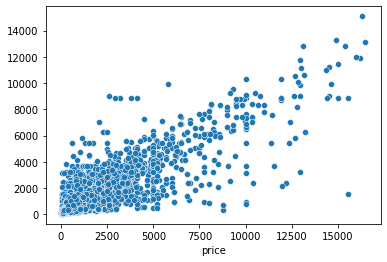

In [44]:
sns.scatterplot(x=y_train, y=y_train_preds)

The rsquared value for the training data was good, meaning that the predict values for price in training were close to the real ones for most of the records. For the test data it is necessary some treatment to improve the results.